## About Dataset

<h4><font color='purple'>There are 3 types of input features:</font></h4>
<ul>
    <li>Objective: factual information;</li>
    <li>Examination: results of medical examination;</li>
    <li>Subjective: information given by the patient.</li>
</ul>

<h4><font color = 'purple'>Features:</font></h4>
<ul>
    <li>Age | Objective Feature | age | int (days)|</li>
    <li>Height | Objective Feature | height | int (cm) |</li>
    <li>Weight | Objective Feature | weight | float (kg) |</li>
    <li>Gender | Objective Feature | gender | categorical code |</li>
    <li>Systolic blood pressure | Examination Feature | ap_hi | int |</li>
    <li>Diastolic blood pressure | Examination Feature | ap_lo | int |</li>
    <li>Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |</li>
    <li>Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |</li>
    <li>Smoking | Subjective Feature | smoke | binary |</li>
    <li>Alcohol intake | Subjective Feature | alco | binary |</li>
    <li>Physical activity | Subjective Feature | active | binary |</li>
    <li>Presence or absence of cardiovascular disease | Target Variable | cardio | binary |</li>
</ul>

- **Systolic blood pressurepressure:** pressure during the heart's contraction or systole.
- **Diastolic blood pressure:** pressure when the heart is at rest or between beats during diastole.
  
<font color='purple'>**All of the dataset values were collected at the moment of medical examination.**</font>



In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_regression, RFECV
sns.set()

In [2]:
data = pd.read_csv('cardio.csv', delimiter= ';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
data.shape

(70000, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


- <font size=3 color='red'>**Eventhough all columns are int64 there are categorical columns in the data set**</font>

In [5]:
df = data.copy() # to prevent changes in original data

In [6]:
df['gender'] = df['gender'].map({1: 'female', 2: 'male'})
df['cholesterol'] = df['cholesterol'].map({1: 'normal', 2: 'above normal', 3: 'well above normal'})
df['gluc'] = df['gluc'].map({1: 'normal', 2: 'above normal', 3: 'well above normal'})
df['smoke'] = df['smoke'].map({0:'No', 1:'Yes'})
df['alco'] = df['alco'].map({0:'No', 1:'Yes'})
df['active'] = df['active'].map({0:'No', 1:'Yes'})


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  object 
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  object 
 8   gluc         70000 non-null  object 
 9   smoke        70000 non-null  object 
 10  alco         70000 non-null  object 
 11  active       70000 non-null  object 
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 6.9+ MB


In [8]:
df.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,male,168,62.0,110,80,normal,normal,No,No,Yes,0
1,1,20228,female,156,85.0,140,90,well above normal,normal,No,No,Yes,1


In [9]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

- <font size=3 color='red'>**There is no any missing values**</font>

In [10]:
df.duplicated().sum()

0

- <font size=3 color='red'>**There is no any duplicate values**</font>

In [11]:
df.drop('id', axis=1, inplace=True) # remove id column. there is no need id column after checked duplicates

In [12]:
df.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,male,168,62.0,110,80,normal,normal,No,No,Yes,0
1,20228,female,156,85.0,140,90,well above normal,normal,No,No,Yes,1


## Exploratory Data Analysis

- <font size=3 color='red'>**Age measured in days. let's convert it to years**</font>

In [13]:
df['age'] = np.round(df['age']/365)

In [14]:
numerical_features = list(df.select_dtypes('number').columns)
categorical_features = list(df.select_dtypes('object').columns)
target_label = 'cardio'

In [15]:
numerical_features

['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cardio']

In [16]:
categorical_features

['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

In [17]:
df[target_label].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

- <font size=3 color='red'>**There is no label imbalance**</font>

In [18]:
df_numeric = df[numerical_features].copy()
df_categorical = df[categorical_features].copy()

In [19]:
df_numeric.head(2)

,age,height,weight,ap_hi,ap_lo,cardio
0,50.0,168,62.0,110,80,0
1,55.0,156,85.0,140,90,1


In [20]:
df_categorical.head(2)

,gender,cholesterol,gluc,smoke,alco,active
0,male,normal,normal,No,No,Yes
1,female,well above normal,normal,No,No,Yes


In [21]:
df_numeric.describe()

,age,height,weight,ap_hi,ap_lo,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,164.359229,74.205690,128.817286,96.630414,0.499700
std,6.765294,8.210126,14.395757,154.011419,188.472530,0.500003
min,30.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000,0.000000
50%,54.000000,165.000000,72.000000,120.000000,80.000000,0.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000,1.000000
max,65.000000,250.000000,200.000000,16020.000000,11000.000000,1.000000


- <font size=3 color='red'>**ap_hi and ap_lo have negative values**</font>
- <font size=3 color='red'>**weight and height should have right skewed destributions**</font>

#### Examine negative values in ap_hi and ap_lo

In [22]:
df_numeric[df_numeric['ap_hi']<0]

,age,height,weight,ap_hi,ap_lo,cardio
4607,42.0,165,78.0,-100,80,0
16021,61.0,161,90.0,-115,70,0
20536,43.0,153,54.0,-100,70,0
23988,50.0,162,74.0,-140,90,1
25240,40.0,168,50.0,-120,80,1
35040,64.0,168,59.0,-150,80,1
46627,65.0,160,59.0,-120,80,0


In [23]:
df_numeric[df_numeric['ap_lo']<0]

,age,height,weight,ap_hi,ap_lo,cardio
60106,62.0,167,74.0,15,-70,1


- <font size=3 color='red'>**Looks like data entry mistakes we can remove negative sign**</font>

In [24]:
df_numeric['ap_hi'] = df_numeric['ap_hi'].apply(lambda x:-x if x<0 else x)
df_numeric['ap_lo'] = df_numeric['ap_lo'].apply(lambda x:-x if x<0 else x)
df['ap_hi'] = df_numeric['ap_hi'].apply(lambda x:-x if x<0 else x)
df['ap_lo'] = df_numeric['ap_lo'].apply(lambda x:-x if x<0 else x)

In [25]:
any(df_numeric['ap_hi']<0)

False

In [26]:
any(df_numeric['ap_lo']<0)

False

In [27]:
df_numeric.describe()

,age,height,weight,ap_hi,ap_lo,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,164.359229,74.205690,128.841429,96.632414,0.499700
std,6.765294,8.210126,14.395757,153.991223,188.471505,0.500003
min,30.000000,55.000000,10.000000,1.000000,0.000000,0.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000,0.000000
50%,54.000000,165.000000,72.000000,120.000000,80.000000,0.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000,1.000000
max,65.000000,250.000000,200.000000,16020.000000,11000.000000,1.000000


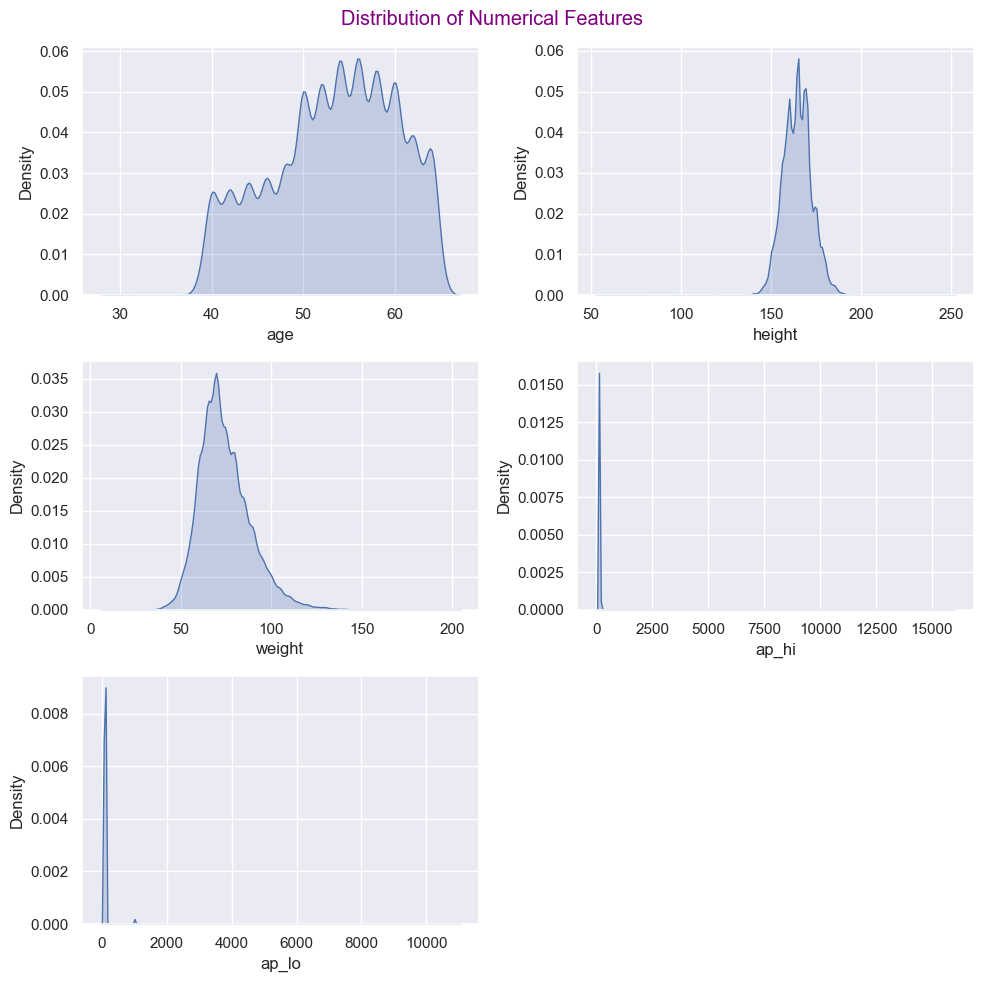

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))

sns.kdeplot(df_numeric['age'], fill=True, ax=axes[0,0])
sns.kdeplot(df_numeric['height'], fill=True, ax=axes[0,1])
sns.kdeplot(df_numeric['weight'], fill=True, ax=axes[1,0])
sns.kdeplot(df_numeric['ap_hi'], fill=True, ax=axes[1,1])
sns.kdeplot(df_numeric['ap_lo'], fill=True, ax=axes[2,0])
axes[2, 1].axis('off')

plt.suptitle('Distribution of Numerical Features', color='purple')
plt.tight_layout()
plt.show()

- <font size=3 color='red'>**Height and weight are somewhat normally distributed**</font>
- <font size=3 color='red'>**ap_hi and ap_lo seems to have high outliers**</font>

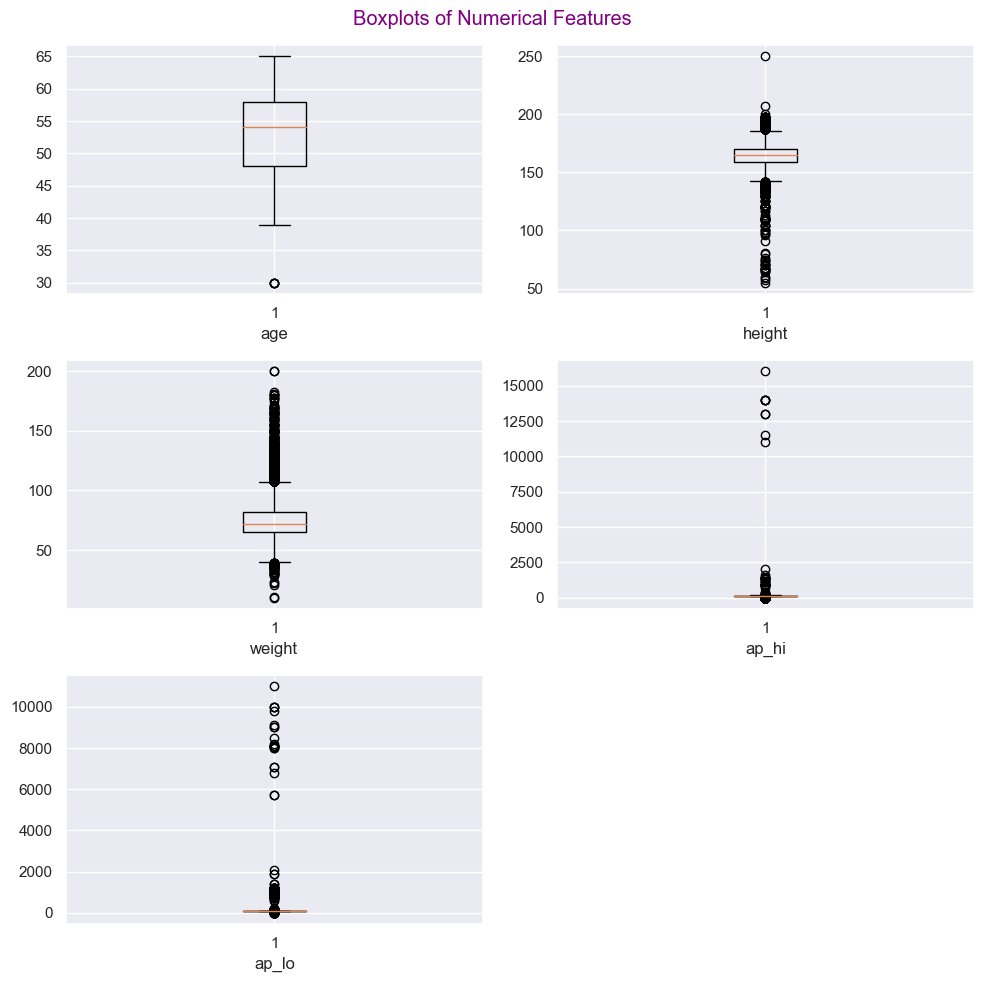

In [29]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))

axes[0, 0].boxplot(df_numeric['age'])
axes[0, 0].set_xlabel('age')
axes[0, 1].boxplot(df_numeric['height'])
axes[0, 1].set_xlabel('height')
axes[1, 0].boxplot(df_numeric['weight'])
axes[1, 0].set_xlabel('weight')
axes[1, 1].boxplot(df_numeric['ap_hi'])
axes[1, 1].set_xlabel('ap_hi')
axes[2, 0].boxplot(df_numeric['ap_lo'])
axes[2, 0].set_xlabel('ap_lo')
axes[2, 1].axis('off')

plt.suptitle('Boxplots of Numerical Features', color='purple')
plt.tight_layout()
plt.show()

- <font size=3 color='red'>**Looks like most features have considerable amount of outliers except age**</font>

In [30]:
# define class for calculate IQR and access relevant data esily
class IQR:
    def __init__(self, feature, data):
        self.feature = feature
        self.data = data

    def calculate_iqr(self):
        q1 = np.percentile(self.data[self.feature], 25)
        q3 = np.percentile(self.data[self.feature], 75)
        iqr = q3 - q1
        lower_limit = q1 - 1.5 * iqr
        upper_limit = q3 + 1.5 * iqr
        self.outliers = self.data[((self.data[self.feature] < lower_limit) | (self.data[self.feature] > upper_limit))]
        return  {
            'q1': q1,
            'q3': q3,
            'iqr': iqr,
            'lower_limit': lower_limit,
            'upper_limit': upper_limit
        }       

- <font size=3 color='red'>**For age, ap_lo and ap_hi we can use iqr method to detect outliers . Because data has skewed (non-normal) distribution.**</font>

#### age

In [31]:
age_iqr = IQR('age', df)

In [32]:
age_iqr.calculate_iqr()

{'q1': 48.0, 'q3': 58.0, 'iqr': 10.0, 'lower_limit': 33.0, 'upper_limit': 73.0}

In [33]:
age_iqr.outliers

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
6219,30.0,female,175,59.0,120,80,normal,normal,No,No,Yes,0
22343,30.0,male,175,92.0,100,60,normal,normal,No,No,Yes,0
30666,30.0,female,159,59.0,120,80,normal,normal,No,No,Yes,0
55905,30.0,female,160,59.0,110,70,normal,normal,No,No,Yes,0


- <font size=3 color='red'>**These age values seem to be fair, so there is no need to remove.**</font>

#### ap_hi

In [34]:
ap_hi_iqr = IQR('ap_hi', df)

In [35]:
ap_hi_iqr.calculate_iqr()

{'q1': 120.0,
 'q3': 140.0,
 'iqr': 20.0,
 'lower_limit': 90.0,
 'upper_limit': 170.0}

- <font size=3 color='red'>**These upper and lower values do not define clear practical scenarios**</font>

#### Standards for Minimum and Maximum Values for Detecting Outliers in Systolic Blood Pressure:

**For Adults (18 Years and Older):**
- *Lower Limit:* 60 mmHg or lower
- *Upper Limit:* 220 mmHg or higher

**For Older Adults (65 Years and Older):**
- *Lower Limit:* 50 mmHg or lower
- *Upper Limit:* 200 mmHg or higher
or higheror higher

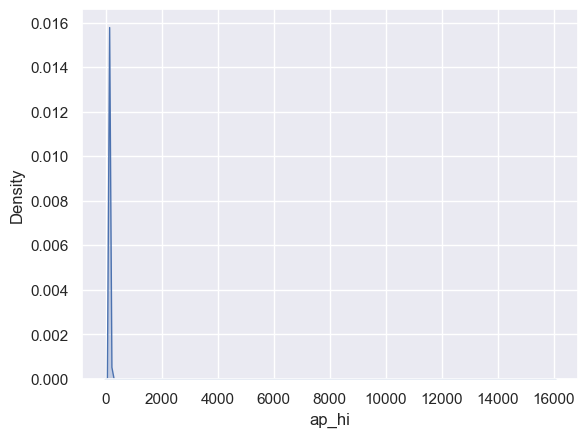

In [36]:
sns.kdeplot(df['ap_hi'], fill=True)
plt.show()

In [37]:
ap_hi_selected = df[(df['ap_hi']>50) & (df['ap_hi']<220)]['ap_hi']

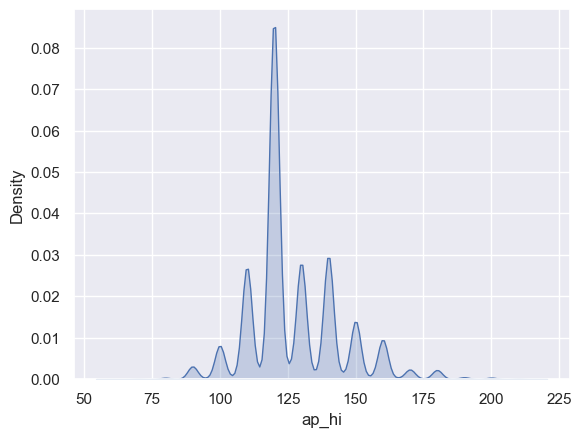

In [38]:
sns.kdeplot(ap_hi_selected, fill=True)
plt.show()

In [39]:
without_ap_hi_outliers = df[(df['ap_hi']>50) & (df['ap_hi']<220)].copy()

In [40]:
without_ap_hi_outliers.shape

(69747, 12)

#### ap_lo

In [41]:
ap_lo_iqr = IQR('ap_lo', df)

In [42]:
ap_lo_iqr.calculate_iqr()

{'q1': 80.0,
 'q3': 90.0,
 'iqr': 10.0,
 'lower_limit': 65.0,
 'upper_limit': 105.0}

- <font size=3 color='red'>**These upper and lower values do not define clear practical scenarios**</font>

#### Standards for Minimum and Maximum Values for Detecting Outliers in Diastolic Blood Pressure:

**For Adults (18 and Older):**
- *Lower Limit:* 40 mmHg or lower
- *Upper Limit:* 110 mmHg or higher

**For Older Adults (65 and Older):**
- *Lower Limit:* 30 mmHg or lower
- *Upper Limit:* 100 mmHg or higher
or higher

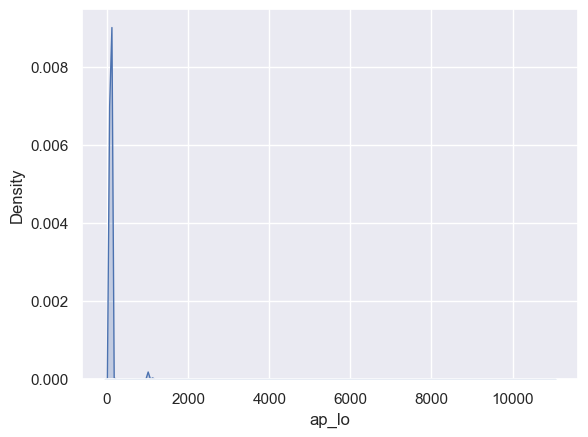

In [43]:
sns.kdeplot(without_ap_hi_outliers['ap_lo'], fill=True)
plt.show()

In [44]:
ap_lo_selected = without_ap_hi_outliers[(without_ap_hi_outliers['ap_lo']>30) & (without_ap_hi_outliers['ap_lo']<110)]['ap_lo']

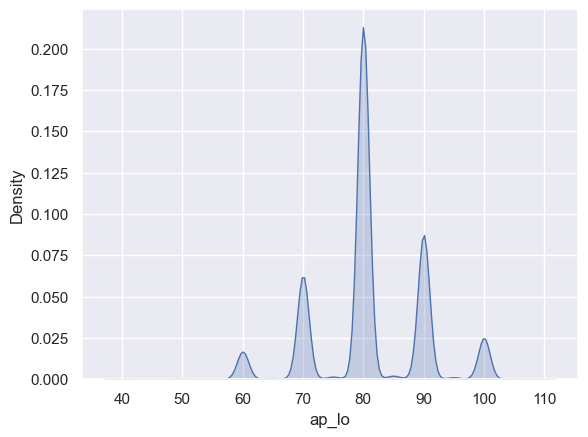

In [45]:
sns.kdeplot(ap_lo_selected, fill=True)
plt.show()

In [46]:
without_ap_lo_hi_outliers = without_ap_hi_outliers[(without_ap_hi_outliers['ap_lo']>30) & (without_ap_hi_outliers['ap_lo']<110)].copy()

In [47]:
without_ap_lo_hi_outliers.shape

(68057, 12)

- <font size=3 color='red'>**Since weight and height are distributed roughly normally, we can use the z-score method to detect outliers.**</font>

#### height

In [48]:
# create class for calculate outliers based on z values
class Z_scores:
    def __init__(self, feature, data, threshold):
        self.feature = feature
        self.data = data
        self.threshold = threshold

    def calculate_Zscore(self):
        z_scores = (self.data[self.feature] - self.data[self.feature].mean()) / self.data[self.feature].std()
        z_score_threshold = self.threshold
        self.outliers_df = self.data[(z_scores > z_score_threshold) | (z_scores < -z_score_threshold)]
        self.df_no_outliers = self.data[(z_scores <= z_score_threshold) & (z_scores >= -z_score_threshold)]


In [49]:
height_zscore = Z_scores('height', df, 3)

In [50]:
height_zscore.calculate_Zscore()

In [51]:
height_zscore.df_no_outliers

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,male,168,62.0,110,80,normal,normal,No,No,Yes,0
1,55.0,female,156,85.0,140,90,well above normal,normal,No,No,Yes,1
2,52.0,female,165,64.0,130,70,well above normal,normal,No,No,No,1
3,48.0,male,169,82.0,150,100,normal,normal,No,No,Yes,1
4,48.0,female,156,56.0,100,60,normal,normal,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53.0,male,168,76.0,120,80,normal,normal,Yes,No,Yes,0
69996,62.0,female,158,126.0,140,90,above normal,above normal,No,No,Yes,1
69997,52.0,male,183,105.0,180,90,well above normal,normal,No,Yes,No,1
69998,61.0,female,163,72.0,135,80,normal,above normal,No,No,No,1


In [52]:
height_zscore.df_no_outliers.shape

(69707, 12)

In [53]:
without_ap_lo_hi_outliers.shape

(68057, 12)

- <font size=3 color='red'>**Since we calculater height outliers based on entire data set we need to match previous data set indexes and select data without outliers**</font>

**This approach ensures that you're treating each feature independently and not biasing the analysis of one feature based on the removal of outliers in another. Removing outliers from Feature 1 should not influence the calculation of outliers for Feature 2.**

In [54]:
without_ap_lo_hi_outliers.reset_index(inplace=True)
without_ap_lo_hi_outliers.head(2)

,index,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,male,168,62.0,110,80,normal,normal,No,No,Yes,0
1,1,55.0,female,156,85.0,140,90,well above normal,normal,No,No,Yes,1


In [55]:
height_selected = height_zscore.df_no_outliers.reset_index()
height_selected.head(2)

,index,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,male,168,62.0,110,80,normal,normal,No,No,Yes,0
1,1,55.0,female,156,85.0,140,90,well above normal,normal,No,No,Yes,1


In [56]:
without_ap_lo_hi_height_outliers= pd.merge(without_ap_lo_hi_outliers, height_selected['index'], on='index', how='inner' )

In [57]:
without_ap_lo_hi_height_outliers.shape

(67775, 13)

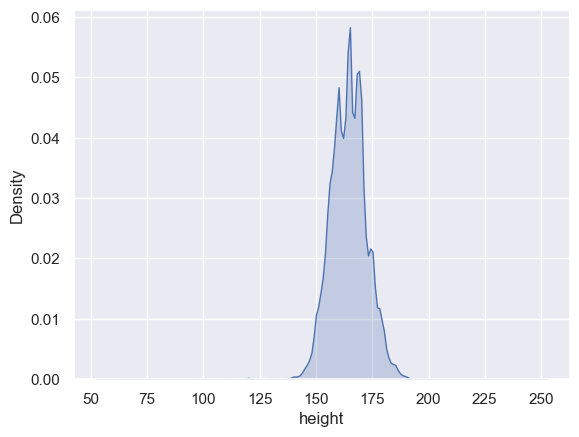

In [58]:
sns.kdeplot(without_ap_lo_hi_outliers['height'], fill=True)
plt.show()

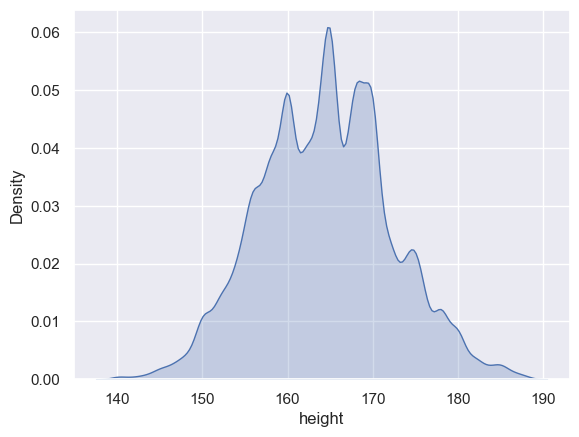

In [59]:
sns.kdeplot(without_ap_lo_hi_height_outliers['height'], fill=True)
plt.show()

#### weight

In [60]:
weight_zscore = Z_scores('weight', df, 3)

In [61]:
weight_zscore.calculate_Zscore()

In [62]:
weight_selected = weight_zscore.df_no_outliers.reset_index()
weight_selected.head(2)

,index,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,male,168,62.0,110,80,normal,normal,No,No,Yes,0
1,1,55.0,female,156,85.0,140,90,well above normal,normal,No,No,Yes,1


In [63]:
df_without_outliers= pd.merge(without_ap_lo_hi_height_outliers, weight_selected['index'], on='index', how='inner' )

In [64]:
df_without_outliers.shape

(67162, 13)

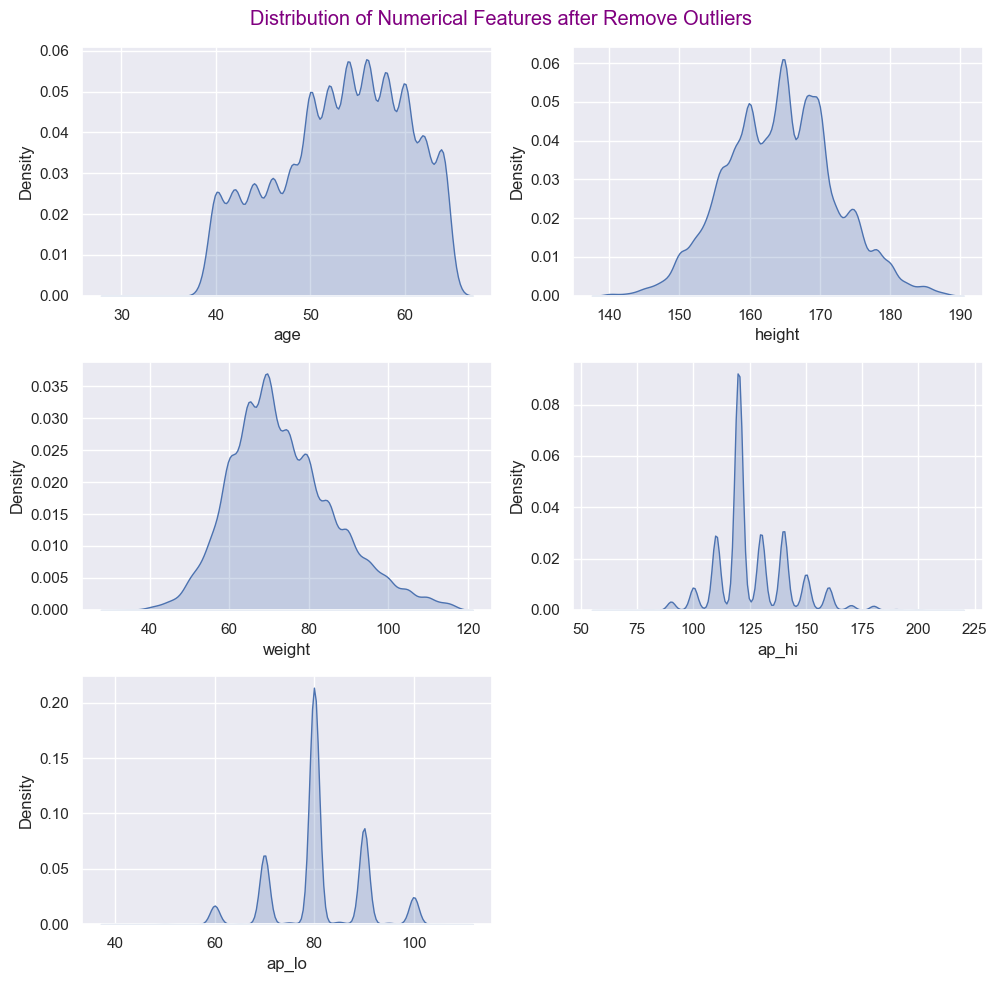

In [65]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))

sns.kdeplot(df_without_outliers['age'], fill=True, ax=axes[0,0])
sns.kdeplot(df_without_outliers['height'], fill=True, ax=axes[0,1])
sns.kdeplot(df_without_outliers['weight'], fill=True, ax=axes[1,0])
sns.kdeplot(df_without_outliers['ap_hi'], fill=True, ax=axes[1,1])
sns.kdeplot(df_without_outliers['ap_lo'], fill=True, ax=axes[2,0])
axes[2, 1].axis('off')

plt.suptitle('Distribution of Numerical Features after Remove Outliers', color='purple')
plt.tight_layout()
plt.show()

In [66]:
df_without_outliers

,index,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,male,168,62.0,110,80,normal,normal,No,No,Yes,0
1,1,55.0,female,156,85.0,140,90,well above normal,normal,No,No,Yes,1
2,2,52.0,female,165,64.0,130,70,well above normal,normal,No,No,No,1
3,3,48.0,male,169,82.0,150,100,normal,normal,No,No,Yes,1
4,4,48.0,female,156,56.0,100,60,normal,normal,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67157,69994,58.0,female,165,80.0,150,80,normal,normal,No,No,Yes,1
67158,69995,53.0,male,168,76.0,120,80,normal,normal,Yes,No,Yes,0
67159,69997,52.0,male,183,105.0,180,90,well above normal,normal,No,Yes,No,1
67160,69998,61.0,female,163,72.0,135,80,normal,above normal,No,No,No,1


In [67]:
df_without_outliers.drop('index', axis=1, inplace=True)

In [68]:
df_without_outliers['age'] = df_without_outliers['age'].astype(int)

### Examine the relationship between the target variable (cardio) and numerical features.

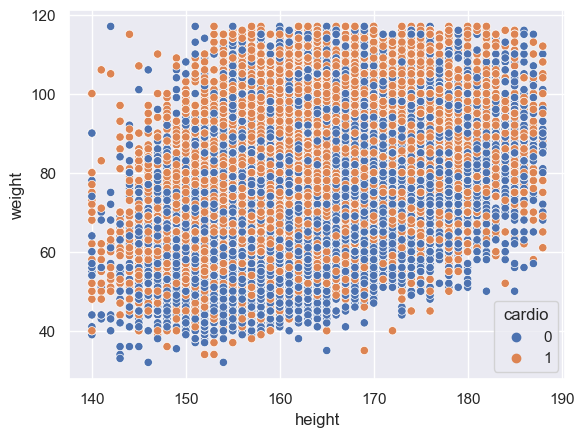

In [69]:
sns.scatterplot(data=df_without_outliers, x='height', y='weight', hue = 'cardio')
plt.show()

- <font size=3 color='red'>**No pattern here**</font>

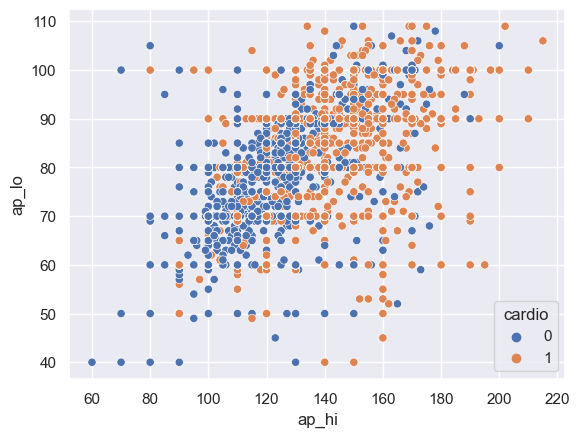

In [70]:
sns.scatterplot(data=df_without_outliers, x='ap_hi', y='ap_lo', hue = 'cardio')
plt.show()

- <font size=3 color='red'>**Looks like high values of ap_hi and ap_lo have a potentially higher presence in cardiovascular disease.**</font>

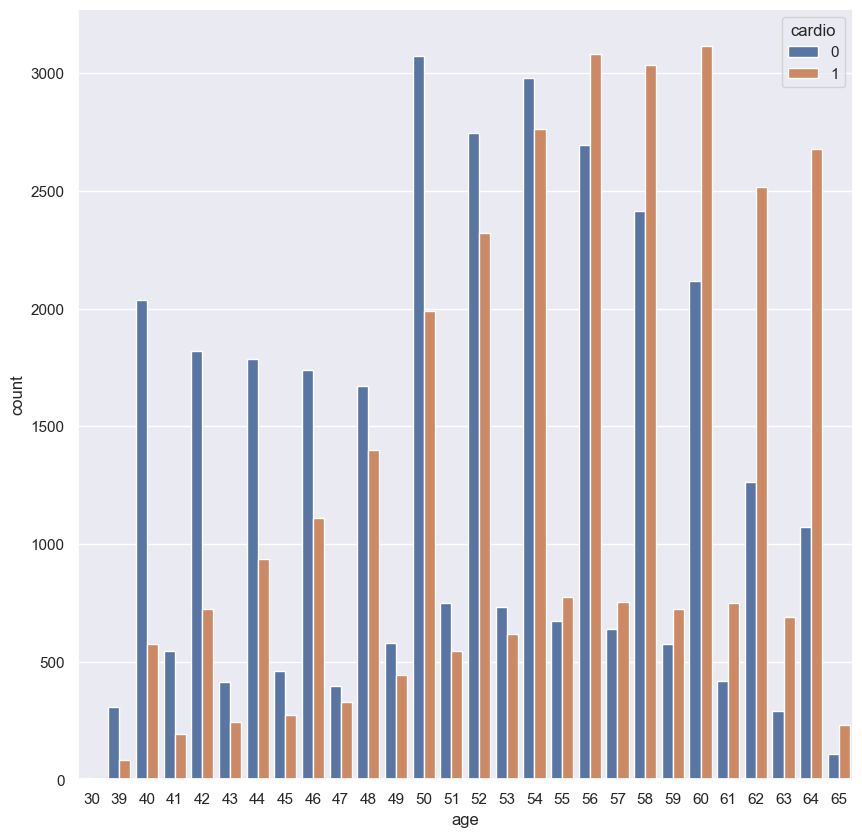

In [71]:
plt.figure(figsize=(10,10))
sns.countplot(data=df_without_outliers,x='age',hue='cardio')
plt.show()

- <font size=3 color='red'>**Looks like higher the age, higher the presence in cardiovascular disease.**</font>

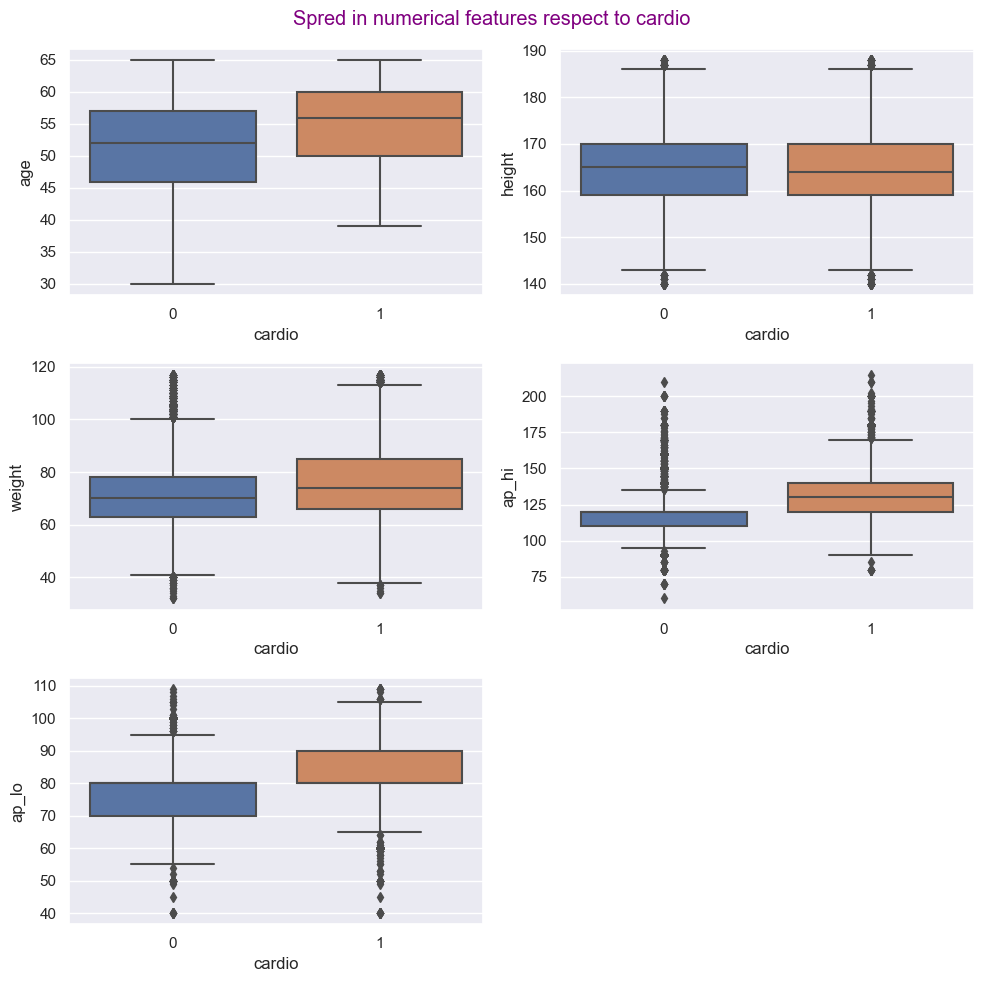

In [72]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))

sns.boxplot(y= df_without_outliers['age'], x=df_without_outliers['cardio'], ax=axes[0,0])
sns.boxplot(y= df_without_outliers['height'], x=df_without_outliers['cardio'], ax=axes[0,1])
sns.boxplot(y= df_without_outliers['weight'], x=df_without_outliers['cardio'], ax=axes[1,0])
sns.boxplot(y = df_without_outliers['ap_hi'], x=df_without_outliers['cardio'], ax=axes[1,1])
sns.boxplot(y = df_without_outliers['ap_lo'], x=df_without_outliers['cardio'], ax=axes[2,0])
axes[2, 1].axis('off')

plt.suptitle('Spred in numerical features respect to cardio', color='purple')
plt.tight_layout()
plt.show()

- <font size=3 color='red'>**There is a greater separation in the values of ap_lo and ap_hi in the presence of cardiovascular disease.**</font>

#### Check correlation between numerical features

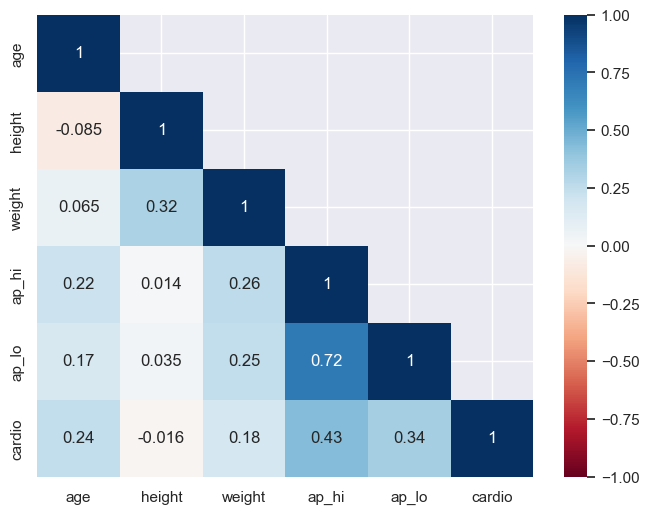

In [73]:
corr_matrix = df_without_outliers[numerical_features].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool),k=1)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='RdBu',vmin=-1,vmax=1,mask=mask)
plt.show()

- <font size=3 color='red'>**It does not seem to have highly correlated features.**</font>

In [74]:
df_without_outliers

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,male,168,62.0,110,80,normal,normal,No,No,Yes,0
1,55,female,156,85.0,140,90,well above normal,normal,No,No,Yes,1
2,52,female,165,64.0,130,70,well above normal,normal,No,No,No,1
3,48,male,169,82.0,150,100,normal,normal,No,No,Yes,1
4,48,female,156,56.0,100,60,normal,normal,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
67157,58,female,165,80.0,150,80,normal,normal,No,No,Yes,1
67158,53,male,168,76.0,120,80,normal,normal,Yes,No,Yes,0
67159,52,male,183,105.0,180,90,well above normal,normal,No,Yes,No,1
67160,61,female,163,72.0,135,80,normal,above normal,No,No,No,1


In [75]:
df_1 = df_without_outliers[numerical_features].copy()

In [76]:
df_1['cardio']=['yes' if i==1 else 'no' for i in df_without_outliers['cardio']]

C:\Users\modhuka\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


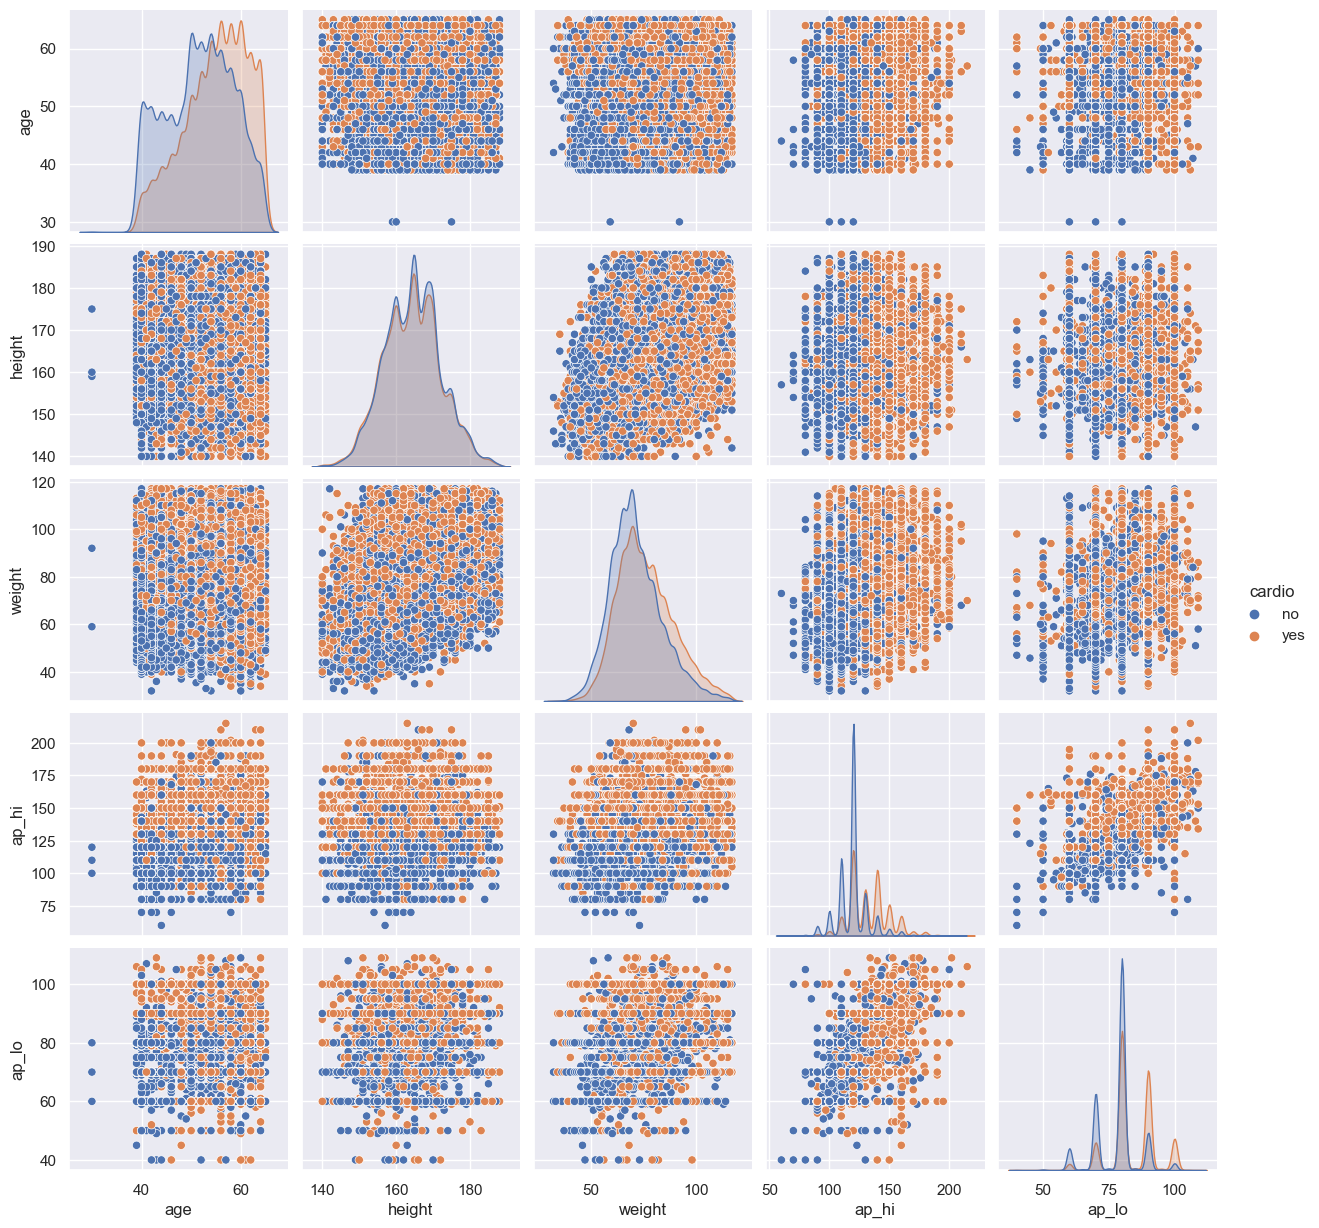

In [77]:
sns.pairplot(df_1,hue='cardio')
plt.show()

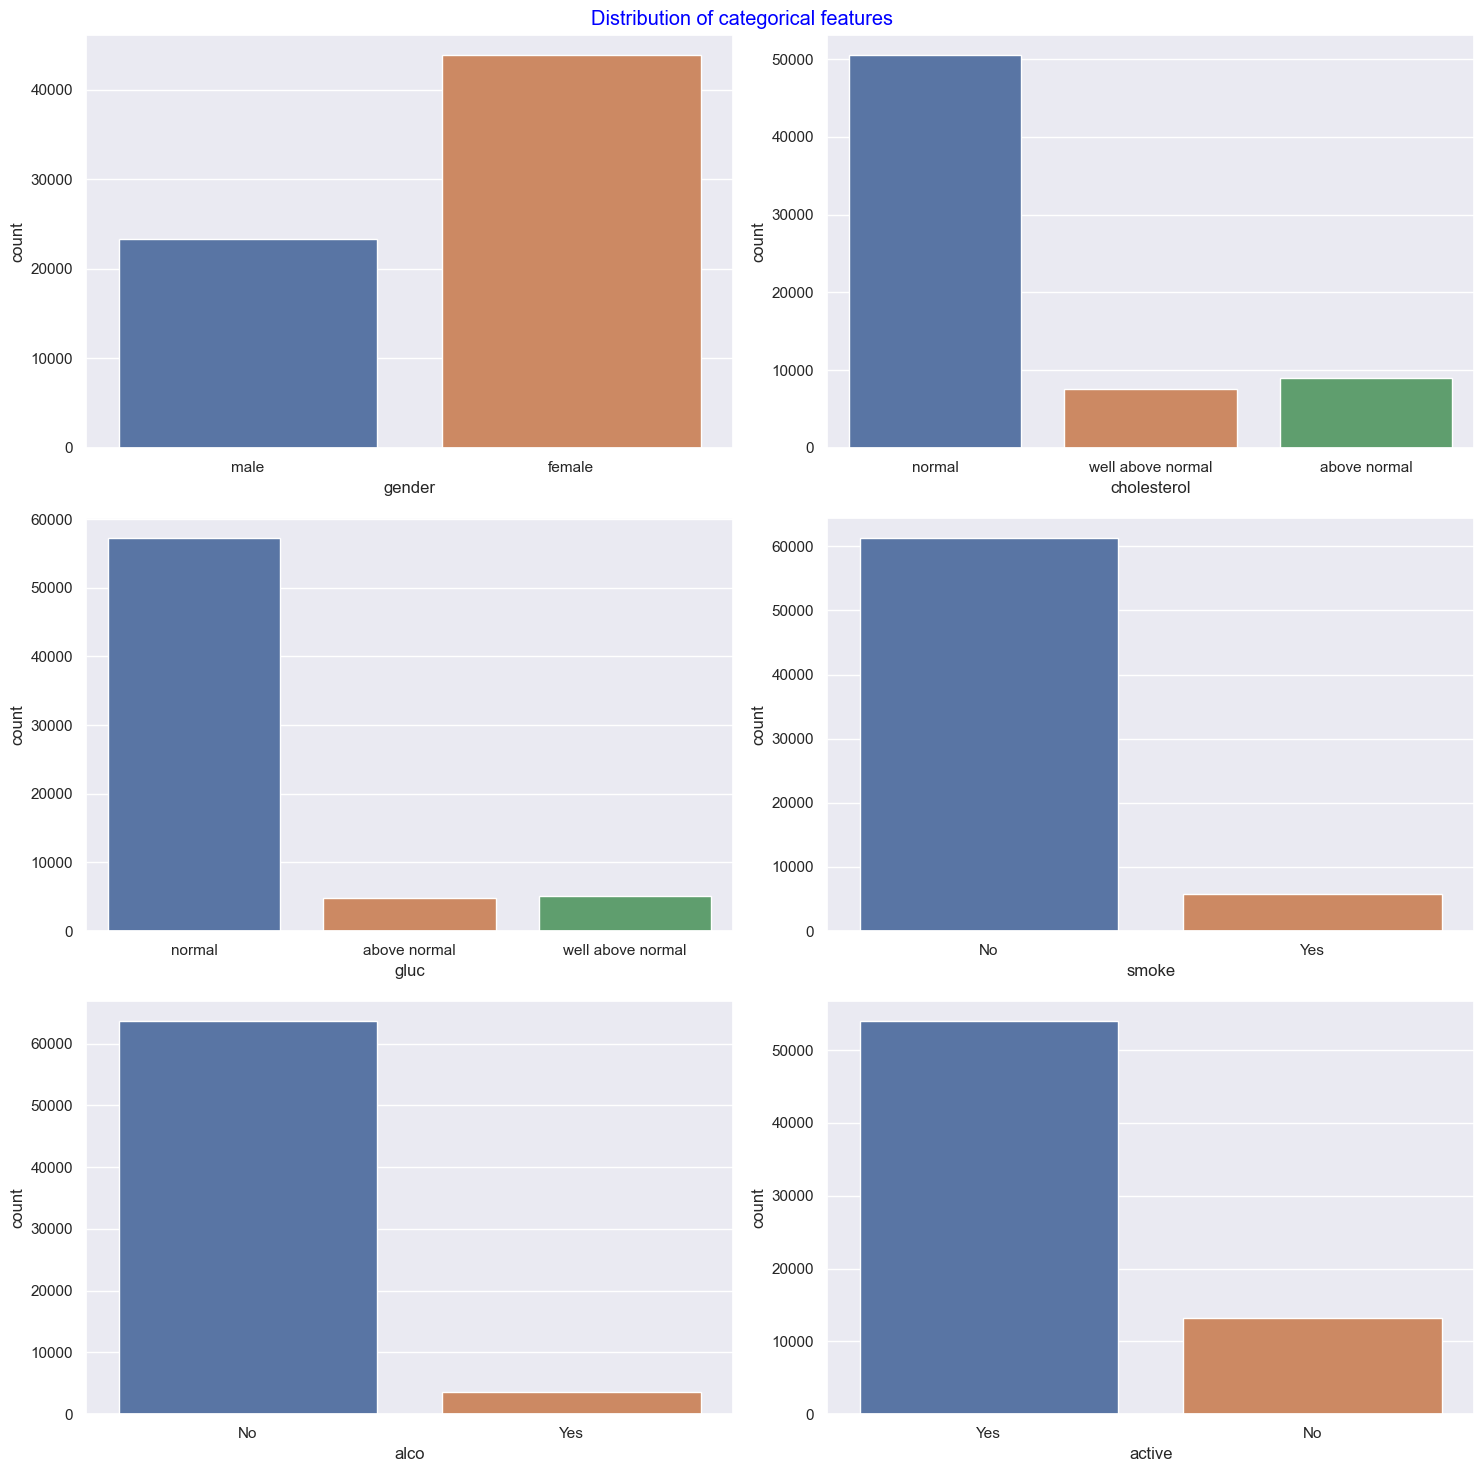

In [78]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))

sns.countplot(data=df_without_outliers, x='gender', ax=axes[0,0])
sns.countplot(data=df_without_outliers, x='cholesterol', ax=axes[0,1])
sns.countplot(data=df_without_outliers, x='gluc', ax=axes[1,0])
sns.countplot(data=df_without_outliers, x='smoke', ax=axes[1,1])
sns.countplot(data=df_without_outliers, x='alco', ax=axes[2,0])
sns.countplot(data=df_without_outliers, x='active', ax=axes[2,1])

plt.suptitle('Distribution of categorical features', color='blue')
plt.tight_layout()
plt.show()


- <font size=3 color='red'>**There is high imbalance in all variables**</font>

### Examine the relationship between the target variable (cardio) and categorical features.

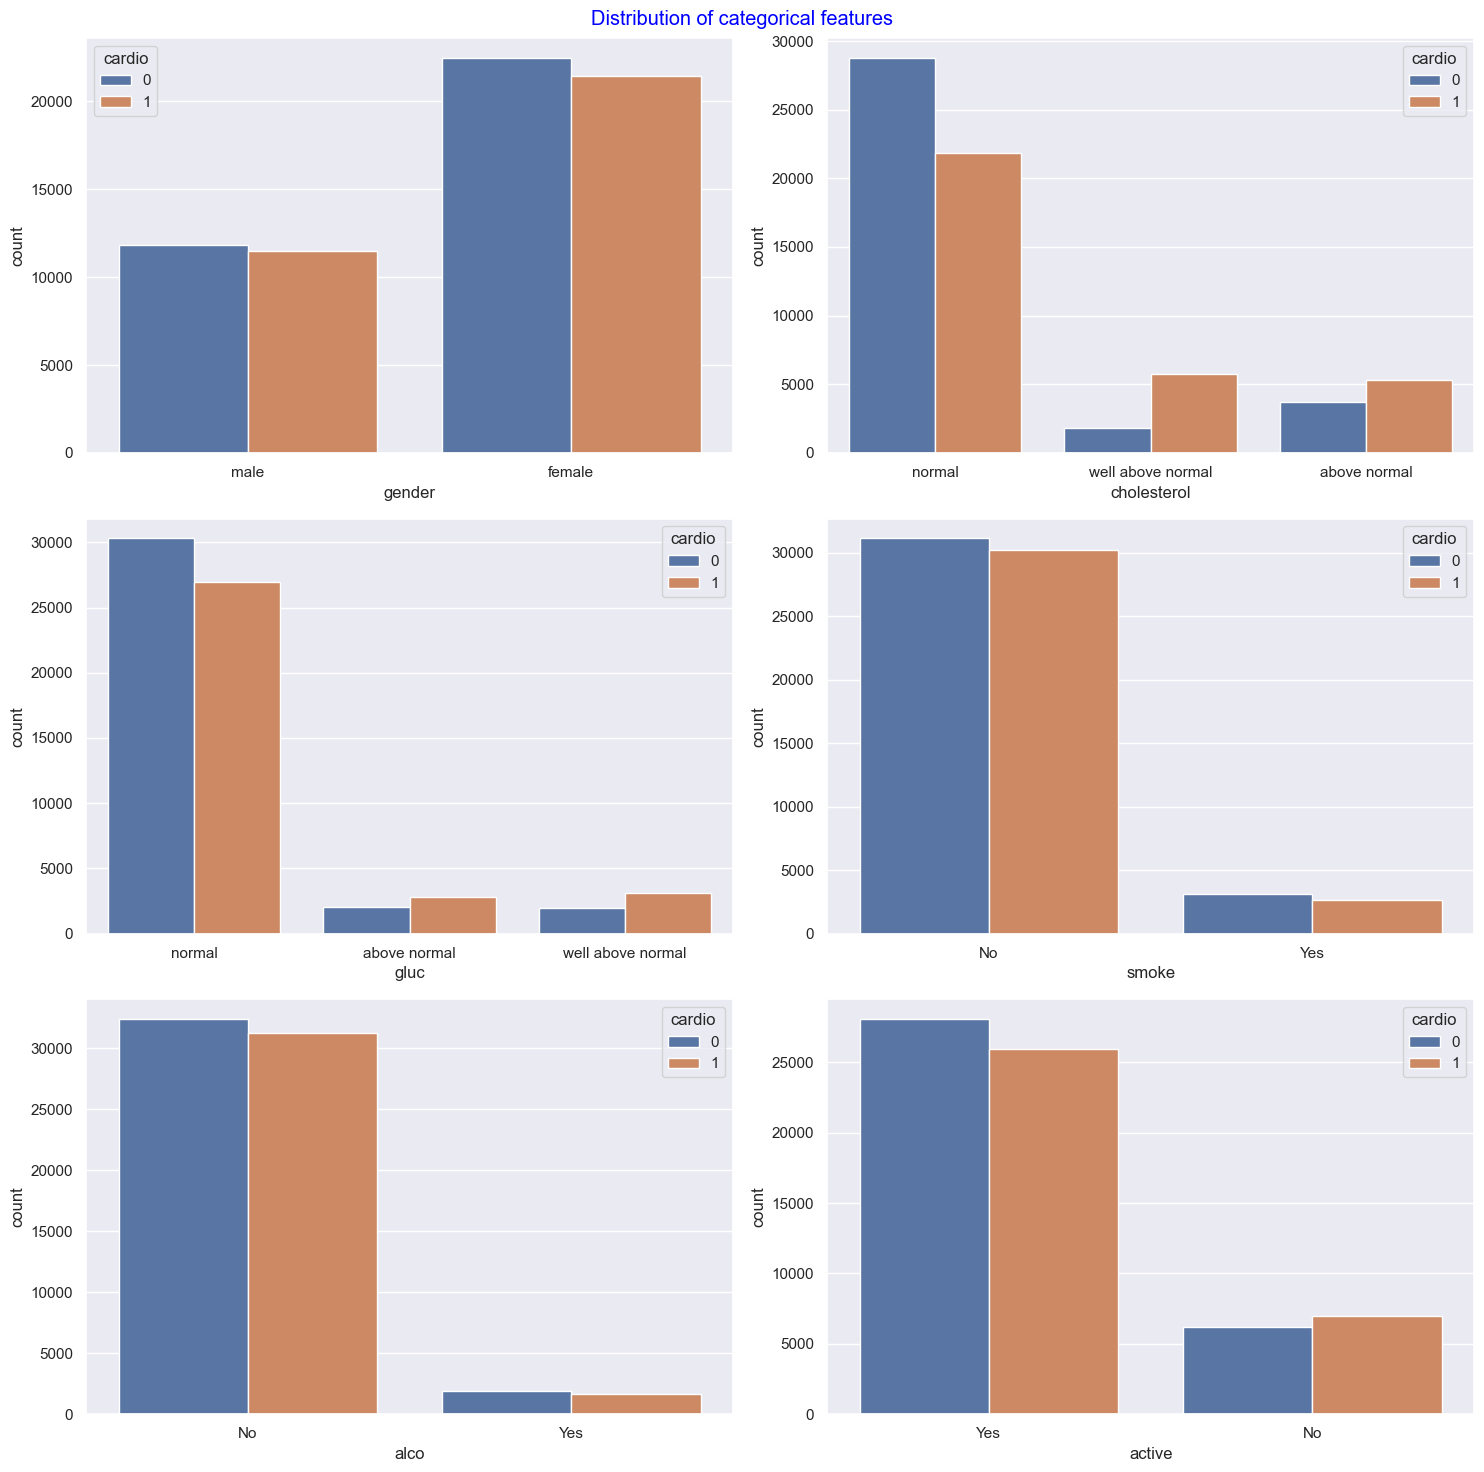

In [79]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))

sns.countplot(data=df_without_outliers, x='gender', hue='cardio', ax=axes[0,0])
sns.countplot(data=df_without_outliers, x='cholesterol', hue='cardio', ax=axes[0,1])
sns.countplot(data=df_without_outliers, x='gluc', hue='cardio', ax=axes[1,0])
sns.countplot(data=df_without_outliers, x='smoke', hue='cardio', ax=axes[1,1])
sns.countplot(data=df_without_outliers, x='alco', hue='cardio', ax=axes[2,0])
sns.countplot(data=df_without_outliers, x='active', hue='cardio', ax=axes[2,1])

plt.suptitle('Distribution of categorical features', color='blue')
plt.tight_layout()
plt.show()


- <font size=3 color='red'>**when cholesterol level and glucose level is high there is higher the presence of cardiovascular disease.**</font>
- <font size=3 color='red'>**Also important to notice that smoke, alcohol status does not show any significance impact of the presence of cardiovascular disease**</font>
- <font size=3 color='red'>**Active persons have a lower chance, and non-active persons have a higher chance of cardiovascular disease.**</font>

**Important to notice that these observations are from the dataset. Also, the dataset has imbalanced features, so the above observations are influenced by those imbalances as well.**

In [80]:
df_without_outliers

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,male,168,62.0,110,80,normal,normal,No,No,Yes,0
1,55,female,156,85.0,140,90,well above normal,normal,No,No,Yes,1
2,52,female,165,64.0,130,70,well above normal,normal,No,No,No,1
3,48,male,169,82.0,150,100,normal,normal,No,No,Yes,1
4,48,female,156,56.0,100,60,normal,normal,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
67157,58,female,165,80.0,150,80,normal,normal,No,No,Yes,1
67158,53,male,168,76.0,120,80,normal,normal,Yes,No,Yes,0
67159,52,male,183,105.0,180,90,well above normal,normal,No,Yes,No,1
67160,61,female,163,72.0,135,80,normal,above normal,No,No,No,1


In [81]:
df_without_outliers.dtypes

age              int32
gender          object
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol     object
gluc            object
smoke           object
alco            object
active          object
cardio           int64
dtype: object

In [82]:
columns_to_convert_to_float64 = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

In [83]:
df_without_outliers[columns_to_convert_to_float64] = df_without_outliers[columns_to_convert_to_float64].astype('float64')

In [84]:
df_without_outliers.dtypes

age            float64
gender          object
height         float64
weight         float64
ap_hi          float64
ap_lo          float64
cholesterol     object
gluc            object
smoke           object
alco            object
active          object
cardio           int64
dtype: object

In [85]:
X = df_without_outliers.drop('cardio', axis=1)
y = df_without_outliers['cardio']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=99)

In [87]:
X_train.shape

(53729, 11)

In [88]:
y_train.shape

(53729,)

In [89]:
y_train.value_counts()

cardio
0    27429
1    26300
Name: count, dtype: int64

In [90]:
y_test.value_counts()

cardio
0    6858
1    6575
Name: count, dtype: int64

In [91]:
categorical_preprocessor = Pipeline(
    steps = [('ohe', OneHotEncoder(drop='first'))]
)

In [92]:
numerical_preprocessor = Pipeline(
    steps = [('minmaxscaler' , MinMaxScaler())]
)

In [93]:
preprocessor = ColumnTransformer(
    [('categorical', categorical_preprocessor, categorical_features),
    ('numerical', numerical_preprocessor, numerical_features[:-1])]   
)

In [94]:
preprocessor

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(drop='first'))]),
                                 ['gender', 'cholesterol', 'gluc', 'smoke',
                                  'alco', 'active']),
                                ('numerical',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['age', 'height', 'weight', 'ap_hi',
                                  'ap_lo'])])

In [95]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [96]:
X_test_preprocessed.shape

(13433, 13)

In [97]:
cval = KFold(n_splits=10)

### Baseline model scores

In [98]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

    models = [LogisticRegression(random_state=99),
              KNeighborsClassifier(),
              RandomForestClassifier(random_state=99),
              LinearSVC(max_iter=10000,random_state=99),
              DecisionTreeClassifier(random_state=99),
              GaussianNB()]
    
    model_list = ['LogisticRegression','KNeighborsClassifier','RandomForestClassifier','LinearSVC','DecisionTreeClassifier','GaussianNB']
    avg_scores=[]
    
    for model in models:
        scores = cross_val_score(estimator=model,X=X_train_preprocessed,y=y_train,cv=cval)
        average = np.round(scores.mean()*100,2)
        avg_scores.append(average)
        print('{} scores : {}'.format(model,scores))
        print('average score : {}%'.format(average))
        print('****************************************************************************************************')
        print()

LogisticRegression(random_state=99) scores : [0.71933743 0.72696817 0.73162107 0.7260376  0.7344128  0.72678206
 0.73422669 0.72361809 0.72566536 0.73119881]
average score : 72.8%
****************************************************************************************************

KNeighborsClassifier() scores : [0.69123395 0.68509213 0.69532849 0.69309511 0.68267262 0.70035362
 0.69253676 0.6942118  0.69346734 0.69396873]
average score : 69.22%
****************************************************************************************************

RandomForestClassifier(random_state=99) scores : [0.69756188 0.70202866 0.71375395 0.70500651 0.69886469 0.71152057
 0.70761213 0.70295924 0.69756188 0.7068131 ]
average score : 70.44%
****************************************************************************************************

LinearSVC(max_iter=10000, random_state=99) scores : [0.71822073 0.72715429 0.73236553 0.72585148 0.73180718 0.72696817
 0.73236553 0.72361809 0.72547925 0.730081

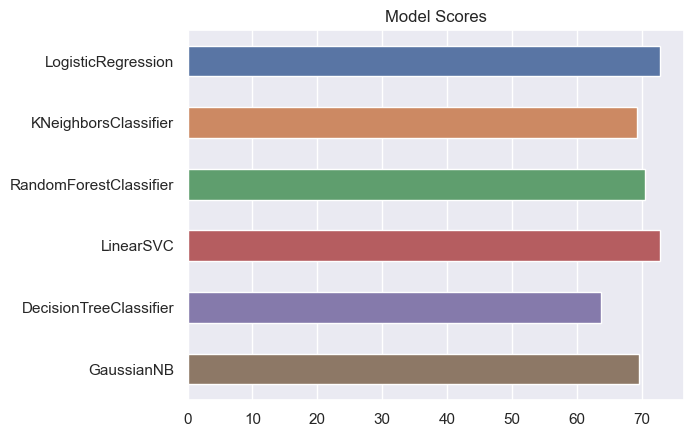

In [99]:
sns.barplot(y=model_list,x=avg_scores,orient='h', width=0.5)
plt.title('Model Scores')
plt.yticks()
plt.show()

- <font size=3 color='red'>**LogisticRegression, LinearSVC have high base line scores (more than 70%)**</font>


#### Try to improve model performances

### Hyper Parameter Tuning

### LogisticRegression

In [100]:
cval = KFold(n_splits=5)

In [101]:
lr = LogisticRegression(max_iter=10000,random_state=99)

In [102]:
param_grid_logistic = {
    'solver':['lbfgs','sag','newton-cg','newton-cholesky','liblinear','saga'],
    'penalty':['l1','l2',None,'elasticnet'],
    'C': [0.01,0.1, 1.0, 10.0],
    'tol': [0.0001, 0.001, 0.01, 0.1]
}

In [103]:
grid_search_logistic = GridSearchCV(estimator=lr,
                             param_grid=param_grid_logistic,
                             cv=cval,
                             verbose=1)

In [104]:
import warnings
from sklearn.exceptions import FitFailedWarning

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FitFailedWarning)
    warnings.filterwarnings("ignore", category=UserWarning)
    grid_search_logistic.fit(X_train_preprocessed,y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


In [105]:
grid_search_logistic.best_score_

0.7288428908411558

In [106]:
grid_search_logistic.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.01}

In [107]:
LogisticRegression_model = grid_search_logistic.best_estimator_

### Linear svc

In [108]:
svc = LinearSVC(max_iter=10000, dual='auto', random_state=99)

In [109]:
param_grid_svc = {
    'loss':['hinge', 'squared_hinge'],
    'penalty':['l1','l2',None,'elasticnet'],
    'C': [0.01,0.1, 1.0, 10.0],
    'tol': [0.0001, 0.001, 0.01, 0.1]
}

In [110]:
grid_search_svc = GridSearchCV(estimator=svc,
                             param_grid=param_grid_svc,
                             cv=cval,
                             verbose=1)

In [111]:
import warnings
from sklearn.exceptions import FitFailedWarning

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FitFailedWarning)
    warnings.filterwarnings("ignore", category=UserWarning)
    grid_search_svc.fit(X_train_preprocessed,y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


In [112]:
grid_search_svc.best_score_

0.7282659440975451

In [113]:
svc_model = grid_search_svc.best_estimator_

### Feature Extraction

- **BMI is popular metrics used in healthcare. We can use BMI instead of height and weight**

<h4>BMI Formula</h4>
<ul>
BMI =  weight (kg) / [height (m)]2
</ul>
Body Mass Index (BMI) is a person's weight in kilograms (or pounds) divided by the square of height in meters (or feet). A high BMI can indicate high body fatness. BMI screens for weight categories that may lead to health problems, but it does not diagnose the body fatness or health of an individual.

In [114]:
X1_train = X_train.copy()
X1_test = X_test.copy()

In [115]:
X1_train['bmi'] = np.round(X1_train['weight']/((X1_train['height']/100)**2), 2)

In [116]:
X1_test['bmi'] = np.round(X1_test['weight']/((X1_test['height']/100)**2), 2)

In [117]:
X1_train.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
44322,54.0,female,158.0,61.0,120.0,80.0,normal,well above normal,No,No,Yes,24.44
23838,40.0,female,155.0,60.0,110.0,80.0,normal,normal,No,No,Yes,24.97


In [118]:
X1_test.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
63672,65.0,female,170.0,85.0,120.0,70.0,normal,normal,No,No,Yes,29.41
3975,60.0,female,166.0,105.0,120.0,80.0,well above normal,normal,No,No,Yes,38.10


In [119]:
X1_train.drop(['weight', 'height'], axis=1, inplace=True)
X1_test.drop(['weight', 'height'], axis=1, inplace=True)

In [120]:
X1_train.head(2)

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
44322,54.0,female,120.0,80.0,normal,well above normal,No,No,Yes,24.44
23838,40.0,female,110.0,80.0,normal,normal,No,No,Yes,24.97


In [121]:
X1_test.head(2)

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
63672,65.0,female,120.0,70.0,normal,normal,No,No,Yes,29.41
3975,60.0,female,120.0,80.0,well above normal,normal,No,No,Yes,38.10


In [122]:
preprocessor1 = ColumnTransformer(
    [('categorical', categorical_preprocessor, categorical_features),
    ('numerical', numerical_preprocessor, list(X1_train.select_dtypes('number').columns))]   
)

In [123]:
preprocessor1

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(drop='first'))]),
                                 ['gender', 'cholesterol', 'gluc', 'smoke',
                                  'alco', 'active']),
                                ('numerical',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['age', 'ap_hi', 'ap_lo', 'bmi'])])

In [124]:
X1_train_preprocessed = preprocessor1.fit_transform(X1_train)
X1_test_preprocessed = preprocessor1.transform(X1_test)

In [125]:
lr1 = LogisticRegression(penalty='l2',
                         tol=0.01,
                         C=1,
                         solver= 'sag',
                         max_iter=10000,
                         random_state=99)

In [126]:
cross_val_score(estimator=lr1, X=X1_train_preprocessed, y=y_train, cv=cval).mean()

0.7284334673384155

- <font size=3 color='red'>**There is no any improvement**</font>

### Use votingclassifier

In [127]:
grid = [('lr',LogisticRegression_model),
       ('svc',svc_model)]

In [128]:
vc_model = VotingClassifier(estimators=grid, voting='hard')

In [129]:
vc_model.fit(X_train_preprocessed, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=10000,
                                                 random_state=99, solver='sag',
                                                 tol=0.01)),
                             ('svc',
                              LinearSVC(C=10.0, dual='auto', loss='hinge',
                                        max_iter=10000, random_state=99,
                                        tol=0.1))])

In [130]:
np.round(cross_val_score(estimator=vc_model,X=X_train_preprocessed,y=y_train,cv=cval).mean()*100,2)

72.74

- <font size=3 color='red'>**There is no any improvement**</font>

- <font size=4 color='purple'>**LogisticRegression is the best Model**</font>

### Validate on Test Dataset

#### Retrain logistic model on whole train set

In [131]:
model = LogisticRegression(penalty='l2',
                         tol=0.01,
                         C=1,
                         solver= 'sag',
                         max_iter=10000,
                         random_state=99)

In [132]:
model.fit(X_train_preprocessed, y_train)

LogisticRegression(C=1, max_iter=10000, random_state=99, solver='sag', tol=0.01)

In [133]:
np.round(model.score(X_train_preprocessed, y_train)*100,2) # total variability explain in train set

72.87

In [134]:
np.round(model.score(X_test_preprocessed, y_test)*100,2)  # total variability explain in test set

72.33

- <font size=3 color='red'>**Total variation explain by the model is almost same in both train and test datasets. There is no overfitting issue in the model**</font>

In [135]:
predicted = model.predict(X_test_preprocessed)

In [136]:
cm = confusion_matrix(y_test, predicted)

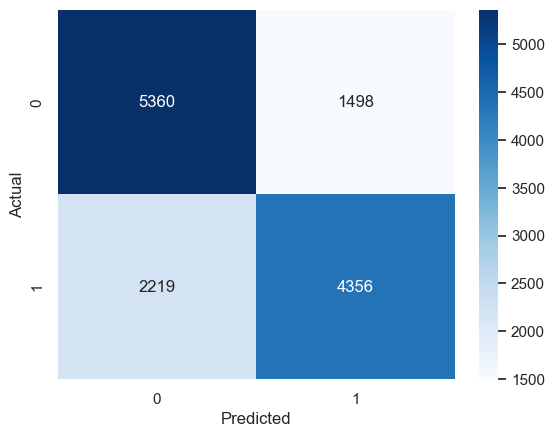

In [137]:
sns.heatmap(data=cm,annot=True,fmt='g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [138]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6858
           1       0.74      0.66      0.70      6575

    accuracy                           0.72     13433
   macro avg       0.73      0.72      0.72     13433
weighted avg       0.73      0.72      0.72     13433



- <font size=3 color='red'>**This is a Balance model. f1 scores are nearly equal for both classes**</font>

In [139]:
pred_prob = model.predict_proba(X_test_preprocessed)

In [140]:
fpr, tpr, thresh =roc_curve(y_test, pred_prob[:,1])

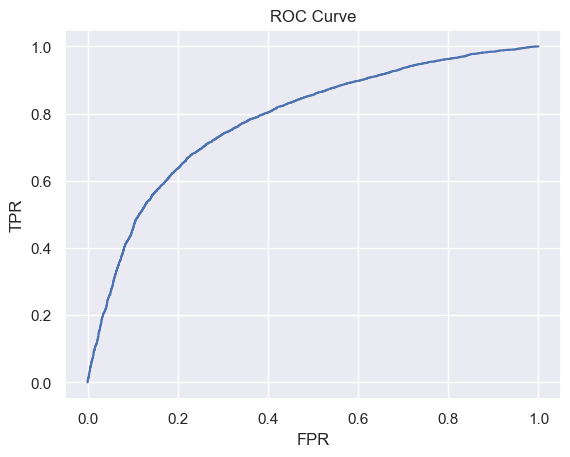

In [141]:
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### save model and preprocessor as pickle files

In [142]:
import pickle
with open('model.pickle','wb') as f:
    pickle.dump(model,f)

In [143]:
with open('preprocessor.pickle','wb') as f:
    pickle.dump(preprocessor,f)

### Consider different industry requirements and adjust the final model 

In [144]:
# function for return classificatoin report and confution matrix for different thresholds
def custom_thresholds(threshold):
    y_probabilities = model.predict_proba(X_test_preprocessed)[:, 1]
    y_predictions = (y_probabilities >= threshold).astype(int)
    cm = confusion_matrix(y_test, y_predictions)
    sns.heatmap(data=cm,annot=True,fmt='g',cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print()
    print(classification_report(y_test, y_predictions))

### Scenario 1

- <font size=3 color='purple'>**Consider our client in a private hospital; their requirement is to identify all patients with the disease as accurately as possible. They are okay with some misidentifications regarding positive patients, as it does not pose a threat to the patients' lives.**</font>

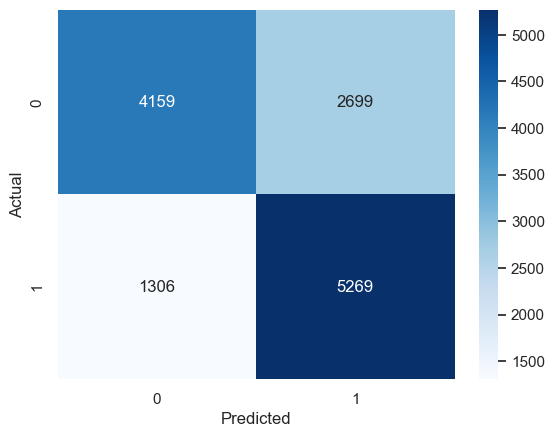


              precision    recall  f1-score   support

           0       0.76      0.61      0.67      6858
           1       0.66      0.80      0.72      6575

    accuracy                           0.70     13433
   macro avg       0.71      0.70      0.70     13433
weighted avg       0.71      0.70      0.70     13433



In [145]:
custom_thresholds(0.4)

- <font size=3 color='red'>**Can identify 80 percent of people have disease.**</font>
- <font size=3 color='red'>**When identify as a patient with disease there is 66 chance that to be true.**</font>

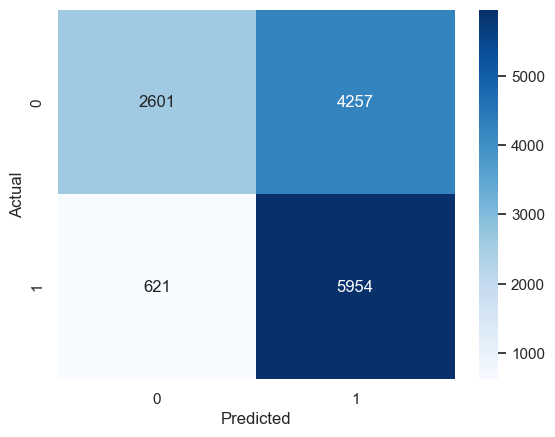


              precision    recall  f1-score   support

           0       0.81      0.38      0.52      6858
           1       0.58      0.91      0.71      6575

    accuracy                           0.64     13433
   macro avg       0.70      0.64      0.61     13433
weighted avg       0.70      0.64      0.61     13433



In [146]:
custom_thresholds(0.3) 

- <font size=3 color='red'>**Can identify 91 percent of people have disease.**</font>
- <font size=3 color='red'>**When identify as a patient with disease there is 58 chance that to be true.**</font>

### Scenario 2

- <font size=3 color='purple'>**Consider our client, an online medicine shop. They wish to offer a 50 percent discount on specific medicines to customers who have a disease. Their requirement is to send the discount offer via email only to customers with a disease.**</font>

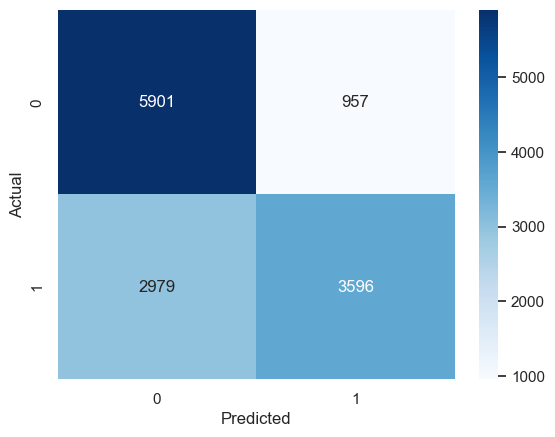


              precision    recall  f1-score   support

           0       0.66      0.86      0.75      6858
           1       0.79      0.55      0.65      6575

    accuracy                           0.71     13433
   macro avg       0.73      0.70      0.70     13433
weighted avg       0.73      0.71      0.70     13433



In [147]:
custom_thresholds(0.6)

- <font size=3 color='red'>**Only identify 55 percent of people have disease.**</font>
- <font size=3 color='red'>**When identify as a patient with disease there is 79 chance that to be true.**</font>

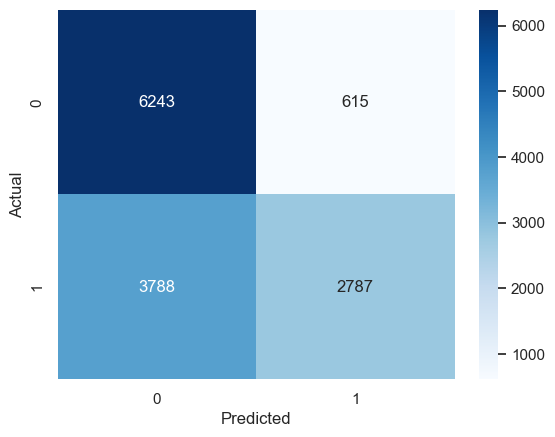


              precision    recall  f1-score   support

           0       0.62      0.91      0.74      6858
           1       0.82      0.42      0.56      6575

    accuracy                           0.67     13433
   macro avg       0.72      0.67      0.65     13433
weighted avg       0.72      0.67      0.65     13433



In [148]:
custom_thresholds(0.7)

- <font size=3 color='red'>**Only identify 42 percent of people have disease.**</font>
- <font size=3 color='red'>**When identify as a patient with disease there is 82 chance that to be true.**</font>